# SESSION 6 : Prompts in LangChain | Generative AI using LangChain | Video 4

https://youtu.be/3TGqlQxpuU0?list=PLKnIA16_RmvaTbihpo4MtzVm4XOQa0ER0

__Prompts__ are the input instructions or queries given to a model to guide its output.

A PromptTemplate in LangChain is a structured way to create prompts dynamically by inserting variables into a predefined template. 

Instead of hardcoding prompts, PromptTemplate allows you to define placeholders that can be filled in at runtime with different inputs. 

This makes it reusable, flexible, and easy to manage, especially when working with dynamic user inputs or automated workflows.

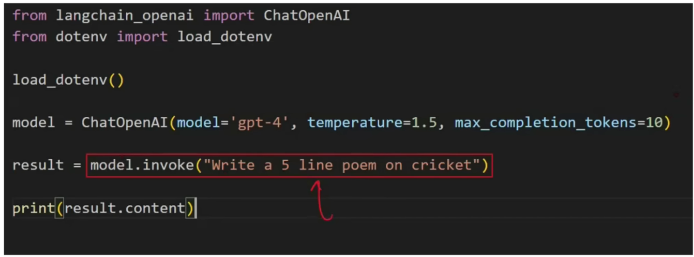

### Dynamic Prompt template : 

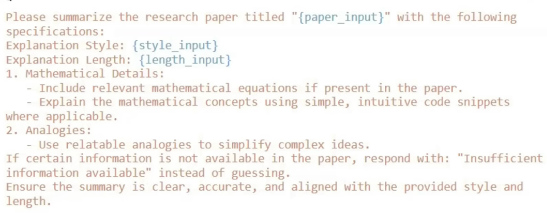

#### Why use PromptTemplate over f strings?


1. Default validation : `validate_template=True` then all the templates will be checked if they are present in input varibales.


2. Reusable 


3. LangChain Ecosystem

### **Types of Prompts in LangChain**

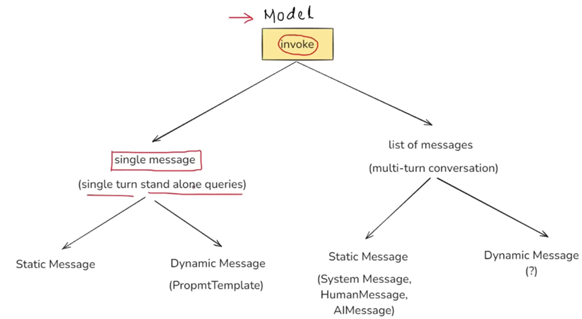

1. **PromptTemplate**  
   - Allows you to create dynamic and reusable prompts with placeholders.
   - Example:
     ```python
     from langchain.prompts import PromptTemplate

     template = PromptTemplate(
         input_variables=["company"],
         template="Summarize the latest SEC 10-K filing for {company}."
     )

     prompt_text = template.format(company="Tesla")
     print(prompt_text)
     # Output: Summarize the latest SEC 10-K filing for Tesla.
     ```

2. **Few-Shot Prompting**  
   - Provides examples to guide the LLM towards better responses.
   - Example:
     ```python
     from langchain.prompts import FewShotPromptTemplate

     examples = [
         {"question": "What is SEC?", "answer": "The SEC is the U.S. Securities and Exchange Commission."},
         {"question": "What is a 10-K filing?", "answer": "A 10-K is an annual financial report filed by public companies."}
     ]

     example_template = PromptTemplate(
         input_variables=["question", "answer"],
         template="Q: {question}\nA: {answer}\n"
     )

     few_shot_prompt = FewShotPromptTemplate(
         examples=examples,
         example_prompt=example_template,
         prefix="Answer the following financial questions:",
         suffix="Q: {input}\nA:",
         input_variables=["input"]
     )

     final_prompt = few_shot_prompt.format(input="What is a 10-Q filing?")
     print(final_prompt)
     ```

3. **ChatPromptTemplate (for Chat Models like GPT-4, Claude, etc.)**  
   - Used to structure prompts for chat-based models.
   - Example:
     ```python
     from langchain.prompts import ChatPromptTemplate, HumanMessagePromptTemplate, SystemMessagePromptTemplate

     chat_prompt = ChatPromptTemplate.from_messages([
         SystemMessagePromptTemplate.from_template("You are a financial assistant."),
         HumanMessagePromptTemplate.from_template("Summarize the latest 10-K filing for {company}.")
     ])

     formatted_prompt = chat_prompt.format_messages(company="Apple")
     ```

### **Why Use LangChain Prompts?**


- **Reusability**: Templates can be dynamically formatted.


- **Few-shot prompting**: Helps guide LLMs with examples.


- **Integration with LLMs**: Works seamlessly with OpenAI, Anthropic, etc.


- **Structured responses**: Helps improve prompt engineering.

## Using Chat Prompt template:

### NOTE : only used when sending list of messages dynamically

```python
from langchain_core.prompts import ChatPromptTemplate
from langchain_core.messages import SystemMessage, HumanMessage, AIMessage


chat_template = ChatPromptTemplate([
    ('system','You are a helpful {domain} expert'),
    ('human', 'Explain in simple terms what is {topic}')
    ])


prompt = chat_template.invoke({'domain': 'cricket', 'topic': 'reverse swing'})
```

## Types of messages in Langchain :

In **LangChain**, messages are the core building blocks when you interact with **chat models** (like OpenAI GPTs). Instead of passing plain text, LangChain structures conversations into **message types**, each representing the role of the sender or special metadata.

Here are the **different types of messages in LangChain**:



### 1. **HumanMessage**

* Represents a message coming from the **user (human)**.
* Example:

  ```python
  from langchain.schema import HumanMessage
  msg = HumanMessage(content="What is the weather today?")
  ```

---

### 2. **AIMessage**

* Represents a message coming from the **AI model** (the assistant’s reply).
* Example:

  ```python
  from langchain.schema import AIMessage
  msg = AIMessage(content="The weather is sunny and warm.")
  ```

---

### 3. **SystemMessage**

* Used to give **instructions, rules, or context** to the AI at the beginning of a conversation.
* Example:

  ```python
  from langchain.schema import SystemMessage
  msg = SystemMessage(content="You are a helpful assistant specialized in finance.")
  ```

---

### 4. **FunctionMessage**

* Represents the output of a **function/tool call**.
* Useful when the AI calls a function, and you want to pass the results back into the conversation.
* Example:

  ```python
  from langchain.schema import FunctionMessage
  msg = FunctionMessage(name="get_weather", content="{ 'temperature': 25 }")
  ```

---

### 5. **ToolMessage** (newer LangChain API for tool outputs)

* Similar to `FunctionMessage`, but specifically designed for **tool responses**.
* Example:

  ```python
  from langchain.schema import ToolMessage
  msg = ToolMessage(content="{'stock_price': 150}", tool_call_id="abc123")
  ```

---

### 6. **ChatMessage**

* A **generic message type** where you explicitly define the role (like `"user"`, `"assistant"`, `"moderator"`).
* Example:

  ```python
  from langchain.schema import ChatMessage
  msg = ChatMessage(role="critic", content="This answer could be improved.")
  ```

---

✅ **Summary Table**

| Message Type        | Who Sends It?                     | Purpose                             |
| ------------------- | --------------------------------- | ----------------------------------- |
| **HumanMessage**    | User / Human                      | User’s input                        |
| **AIMessage**       | AI Model                          | AI’s response                       |
| **SystemMessage**   | Developer / System                | Rules & context                     |
| **FunctionMessage** | System (after function execution) | Return function outputs             |
| **ToolMessage**     | System (after tool execution)     | Return tool outputs                 |
| **ChatMessage**     | Flexible (custom roles)           | Custom roles beyond human/AI/system |

---

⚡In practice:

* A conversation is just a **list of messages**.
* Example:

```python
from langchain.schema import HumanMessage, AIMessage, SystemMessage

conversation = [
    SystemMessage(content="You are a financial advisor."),
    HumanMessage(content="Suggest me some investment options."),
    AIMessage(content="You could consider mutual funds, stocks, or bonds."),
]
```

## Message Placeholder : where messages can be used

A __MessagesPlaceholder__ in LangChain is a special placeholder used inside a __ChatPromptTemplate__ to dynamically insert chat history or a list of messages at runtime.

In **LangChain**, a **MessagePlaceholder** is used inside a **prompt template** when you want to **dynamically inject a sequence of chat history messages** (instead of just one string).

### 🔑 Benefits of Using `MessagesPlaceholder` in Chat History

### 1. **Keeps the Conversation Context**

Instead of manually concatenating old user+AI messages into a single string, you can insert the **entire structured history** (with roles preserved: Human, AI, System, etc.).
This helps the LLM better understand the ongoing dialogue.

---

### 2. **Role-Aware Context (Better than Plain Strings)**

Since LangChain’s `MessagesPlaceholder` injects **actual messages**, the LLM sees them as structured inputs:

* `HumanMessage(content="...")`
* `AIMessage(content="...")`

This is **more reliable** than dumping raw text, because the model knows **who said what**.

---

### 3. **Scalability for Long Conversations**

When you add memory (like `ConversationBufferMemory`), you don’t need to rewrite the prompt each time.
The `MessagesPlaceholder` will automatically pull in the stored history, making your pipeline cleaner.

---

### 4. **Flexibility Across Memory Types**

Whether you’re using:

* `ConversationBufferMemory` (all history)
* `ConversationBufferWindowMemory` (last k messages)
* `ConversationSummaryMemory` (summarized history)

The same placeholder slot will be filled dynamically.
👉 You don’t change your prompt — memory decides what goes inside.

---

### 5. **Keeps Prompt Templates Clean**

Instead of bloating your template with a giant `{history}` string, you just insert:

```python
MessagesPlaceholder(variable_name="chat_history")
```

Now your prompt is neat, and LangChain handles injecting history messages.

---

## ⚡ Example

```python
from langchain.prompts import ChatPromptTemplate, MessagesPlaceholder
from langchain.memory import ConversationBufferMemory

# Create memory
memory = ConversationBufferMemory(return_messages=True)

# Add some history
memory.chat_memory.add_user_message("Hi, what is 2+2?")
memory.chat_memory.add_ai_message("It's 4.")

# Define prompt with placeholder
prompt = ChatPromptTemplate.from_messages([
    ("system", "You are a math tutor."),
    MessagesPlaceholder(variable_name="chat_history"),
    ("human", "{question}")
])

# Format with new question
formatted = prompt.format_prompt(
    chat_history=memory.chat_memory.messages,
    question="What is 3+5?"
)

print(formatted.to_messages())
```

### Output:

```text
SystemMessage: You are a math tutor.
HumanMessage: Hi, what is 2+2?
AIMessage: It's 4.
HumanMessage: What is 3+5?
```

✅ **In short:**
`MessagesPlaceholder` is powerful because it keeps the **structure, roles, and flexibility** of conversation history intact — which improves **accuracy, context, and maintainability** of your LangChain chat applications.